In [ ]:
import random
import torch
from torch import nn
from pathlib import Path
import os
import pandas as pd
from PIL import Image
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset, DataLoader ,Dataset
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid
import os
from google.colab import drive
import smtplib
from torch.utils.data import ConcatDataset

In [ ]:
device="cuda" if torch.cuda.is_available else "cpu"
#device="cpu"
print(device)
drive.mount('/content/drive')

cuda
Mounted at /content/drive


In [ ]:
! gdown --id 1tJqVqzTObuBVFNmWLDgyyi7Sy6AS1vjy
! gdown --id 1vcBD4AHI6J6HIX9-28cY42PGzyciKd4L
! gdown --id 1DRU_WUWLLhT0JAlFKqCMmwpGtdBzNnd3
!unrar x dl_eee.rar
!unrar x drones.rar
!unrar x drone_1.rar

Streaming output truncated to the last 5000 lines.
Extracting  drones/eee_03/data/1692.bmp                                   88%  OK 
Extracting  drones/eee_03/data/1693.bmp                                   88%  OK 
Extracting  drones/eee_03/data/1694.bmp                                   88%  OK 
Extracting  drones/eee_03/data/1695.bmp                                   88%  OK 
Extracting  drones/eee_03/data/1696.bmp                                   88%  OK 
Extracting  drones/eee_03/data/1697.bmp                                   88%  OK 
Extracting  drones/eee_03/data/1698.bmp                                   88%  OK 
Extracting  drones/eee_03/data/1699.bmp                                   88%  OK 
Extracting  drones/eee_03/data/17.bmp                                     88%  OK 
Extracting  drones/eee_03/data/170.bmp                                    88%  OK 
Extracting  drones/eee_03/dat

In [ ]:
data_path = Path('/content/drive/MyDrive/Colab Notebooks/data')
licenta_path=data_path/"licenta"
print(licenta_path)

img_paths_01='drones/eee_01/data'
img_paths_02='drones/eee_02/data'
img_paths_03='drones/eee_03/data'

img_paths_04='nya/data'

labels_01="dl_eee_1.csv"
labels_02="dl_eee_2.csv"
labels_03="dl_eee_3.csv"

labels_04="dl_nya.csv"
traslation_path=data_path/"licenta/Translation"

/content/drive/MyDrive/Colab Notebooks/data/licenta


In [ ]:
class GreyToRGB(object):
    def __call__(self, tensor):
        tensor = torch.cat([tensor, tensor, tensor], dim=0)
        return tensor


transform_drones = transforms.Compose([
    transforms.CenterCrop(376),
    transforms.Resize((128)),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.4),
    transforms.ToTensor(),
    GreyToRGB(),
    transforms.Normalize((0,), (1,)),
])

class CustomDataset(Dataset):
    def __init__(self, directory, csv_file, transform=None):
        self.directory = directory
        self.transform = transform
        self.labels = pd.read_csv(csv_file,header=None)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img1_name = os.path.join(self.directory, self.labels.iloc[idx, 0])
        img2_name = os.path.join(self.directory, self.labels.iloc[idx, 1])

        label = [self.labels.iloc[idx, i] for i in range(2, 14)]
        label = torch.tensor(label, dtype=torch.float32)

        img1 = Image.open(img1_name)
        img2 = Image.open(img2_name)

        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)
        img = torch.cat([img1, img2], dim=0)

        return img,label

In [ ]:
seed = 27
random.seed(seed)
torch.manual_seed(seed)
dataset_01=CustomDataset(img_paths_01,labels_01,transform_drones)
dataset_02=CustomDataset(img_paths_02,labels_02,transform_drones)
dataset_03=CustomDataset(img_paths_03,labels_03,transform_drones)

dataset_04=CustomDataset(img_paths_04,labels_04,transform_drones)


print(len(dataset_01))
print(len(dataset_02))
print(len(dataset_03))
print(len(dataset_04))

indices_1 = range(len(dataset_01))
indices_2 = range(len(dataset_02))
indices_3 = range(len(dataset_03))

train_indices_1, test_indices_1 = train_test_split(indices_1, test_size=0.2, shuffle=True)
train_indices_2, test_indices_2 = train_test_split(indices_2, test_size=0.2, shuffle=True)
train_indices_3, test_indices_3 = train_test_split(indices_3, test_size=0.2, shuffle=True)

train_subset_1 = Subset(dataset_01, train_indices_1)
test_subset_1 = Subset(dataset_01, test_indices_1)

train_subset_2 = Subset(dataset_02, train_indices_2)
test_subset_2 = Subset(dataset_02, test_indices_2)

train_subset_3 = Subset(dataset_03, train_indices_3)
test_subset_3 = Subset(dataset_03, test_indices_3)

dataset_train=ConcatDataset([train_subset_1,train_subset_2,train_subset_3])
dataset_test=ConcatDataset([test_subset_1,test_subset_2,test_subset_3])

batch_size=64
train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

test_eval_1 = DataLoader(dataset_01, batch_size=batch_size, shuffle=False)
test_eval_2 = DataLoader(dataset_02, batch_size=batch_size, shuffle=False)
test_eval_3 = DataLoader(dataset_03, batch_size=batch_size, shuffle=False)
test_eval_4 = DataLoader(dataset_04, batch_size=batch_size, shuffle=False)

print(len(train_loader))
print(len(test_loader))
print(len(test_eval_1))
print(len(test_eval_2))
print(len(test_eval_3))
print(len(test_eval_4))



3985
3208
1812
3946
113
29
63
51
29
62


In [ ]:
img,label=next(iter(test_loader))
print(f"input size {img.shape}")
print(label)
img,label=next(iter(train_loader))
print(f"input size {img.shape}")
print(label)

input size torch.Size([64, 6, 128, 128])
tensor([[ 9.9998e-01, -5.0466e-03,  3.7932e-04, -1.8927e-02,  5.0478e-03,
          1.0001e+00,  1.2216e-03, -1.6959e-03, -4.3961e-04, -1.2690e-03,
          9.9911e-01, -2.6049e-02],
        [ 9.9945e-01, -1.4080e-02,  1.3051e-03, -1.9715e-01,  1.4105e-02,
          9.9962e-01,  5.9853e-03,  1.8782e-01, -1.3291e-03, -5.9306e-03,
          1.0003e+00, -6.4728e-02],
        [ 9.9994e-01,  2.2981e-03, -1.2120e-04,  8.9154e-03, -2.2809e-03,
          9.9998e-01,  4.2353e-04, -7.5705e-02,  1.1408e-04, -4.9515e-04,
          1.0000e+00,  7.7837e-03],
        [ 9.9989e-01, -8.8968e-03,  1.6748e-03, -1.5903e-01,  8.9718e-03,
          9.9973e-01, -7.1886e-04, -1.3252e-01, -9.7754e-04,  7.2965e-04,
          1.0000e+00, -1.2183e-02],
        [ 9.9981e-01, -1.2318e-02,  1.2872e-02,  1.2122e-02,  1.2476e-02,
          9.9915e-01, -1.4321e-02, -1.0661e-01, -1.2910e-02,  1.4386e-02,
          9.9940e-01,  2.1253e-01],
        [ 1.0000e+00,  1.7152e-03,  1.9

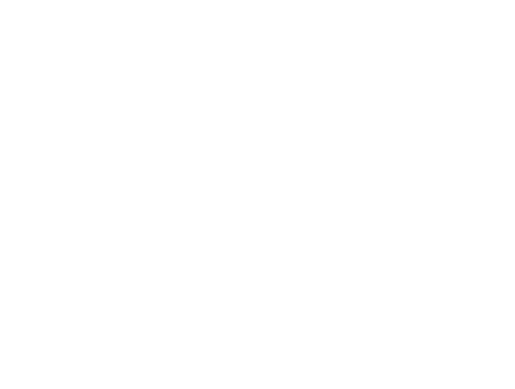

In [ ]:
import torchvision.utils as vutils

# Assuming `img` is a tensor of shape [batch_size, channels, height, width]
img_grid = vutils.make_grid(img, nrow=1, padding=1, normalize=True)

# Convert to numpy array and transpose the dimensions to [height, width, channels]
img_grid = np.transpose(img_grid.cpu().detach().numpy(), (1, 2, 0))
img1, img2 = np.split(img_grid, 2, axis=2)

# Plot the first image
plt.imshow(np.concatenate((img1, img2), axis=1))
plt.axis('off')
plt.show()

# Show the image grid
plt.axis('off')
plt.show()

In [ ]:
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F

class CNN_V1(nn.Module):
    def __init__(self):
        super(CNN_V1, self).__init__()

        pretrained_model = models.resnet50(pretrained=True)

        pretrained_model.conv1 = nn.Conv2d(6, 64, kernel_size=7, stride=2, padding=3, bias=False)

        self.regression = nn.Sequential(
            nn.Linear(1000, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(2048, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),


            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(2048, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 12),
        )

        self.features = pretrained_model
        for name, param in self.features.named_parameters():
            if name.startswith('layer4'):
                param.requires_grad = True
            elif name.startswith('layer3'):
                param.requires_grad = True
            else :
                param.requires_grad = False

    def forward(self, x):
        x = self.features(x)

        #x = F.avg_pool2d(x, kernel_size=4)
        x = x.view(x.size(0), -1)
        x = self.regression(x)
        return x

model_2=CNN_V1()
print(model_2)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


CNN_V1(
  (regression): Sequential(
    (0): Linear(in_features=1000, out_features=2048, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=2048, out_features=4096, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=4096, bias=True)
    (7): ReLU(inplace=True)
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=4096, out_features=4096, bias=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=4096, out_features=2048, bias=True)
    (13): ReLU(inplace=True)
    (14): Dropout(p=0.5, inplace=False)
    (15): Linear(in_features=2048, out_features=1024, bias=True)
    (16): ReLU(inplace=True)
    (17): Dropout(p=0.5, inplace=False)
    (18): Linear(in_features=1024, out_features=512, bias=True)
    (19): ReLU(inplace=True)
    (20): Dropout(p=0.5, inplace=False)
    (21): Linear(in_features=512, out

In [ ]:
MODEL_PATH =Path('/content/drive/MyDrive/Colab Notebooks/models')
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)
MODEL_NAME = "licenta_model_v4.pth"
MODEL_NAME_LOOP ='best_model_v4.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_BEST=MODEL_PATH/ MODEL_NAME_LOOP
MODEL_START_1=MODEL_PATH/'licenta_model_v4.pth'
MODEL_START_2=MODEL_PATH/'best_model_v3.pth'


In [ ]:
model_load_1=CNN_V1()
model_load_1.load_state_dict(torch.load(f=MODEL_START_1,map_location=torch.device('cpu')))
model_load_1 = model_load_1.to(device)
for param in model_load_1.parameters():
    param.requires_grad = True
model_load_1

CNN_V1(
  (regression): Sequential(
    (0): Linear(in_features=1000, out_features=2048, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=2048, out_features=4096, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=4096, bias=True)
    (7): ReLU(inplace=True)
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=4096, out_features=4096, bias=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=4096, out_features=2048, bias=True)
    (13): ReLU(inplace=True)
    (14): Dropout(p=0.5, inplace=False)
    (15): Linear(in_features=2048, out_features=1024, bias=True)
    (16): ReLU(inplace=True)
    (17): Dropout(p=0.5, inplace=False)
    (18): Linear(in_features=1024, out_features=512, bias=True)
    (19): ReLU(inplace=True)
    (20): Dropout(p=0.5, inplace=False)
    (21): Linear(in_features=512, out

In [ ]:
model_load_2=CNN_V1()
model_load_2.load_state_dict(torch.load(f=MODEL_START_2,map_location=torch.device('cpu')))
model_load_2 = model_load_2.to(device)
for param in model_load_2.parameters():
    param.requires_grad = True
model_load_2

CNN_V1(
  (regression): Sequential(
    (0): Linear(in_features=1000, out_features=2048, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=2048, out_features=4096, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=4096, bias=True)
    (7): ReLU(inplace=True)
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=4096, out_features=4096, bias=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=4096, out_features=2048, bias=True)
    (13): ReLU(inplace=True)
    (14): Dropout(p=0.5, inplace=False)
    (15): Linear(in_features=2048, out_features=1024, bias=True)
    (16): ReLU(inplace=True)
    (17): Dropout(p=0.5, inplace=False)
    (18): Linear(in_features=1024, out_features=512, bias=True)
    (19): ReLU(inplace=True)
    (20): Dropout(p=0.5, inplace=False)
    (21): Linear(in_features=512, out

In [ ]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
import torch.optim as optim


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model = model_load_1
model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs=125

start_time = timer()
best_loss =0.000449
patience = 250
counter = 0


for epoch in tqdm(range(num_epochs)):

    model.train()
    train_loss = 0.0
    for batch, (img, labels) in enumerate(train_loader):
        img = img.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(img)
        outputs=outputs.squeeze(1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)

    model.eval()
    test_loss = 0.0
    with torch.inference_mode():
        for batch, (img, labels) in enumerate(test_loader):
            img = img.to(device)
            labels = labels.to(device)

            outputs = model(img)
            outputs=outputs.squeeze(1)

            loss = criterion(outputs, labels)

            test_loss += loss.item()

    test_loss /= len(test_loader)
    print('Epoch [{}/{}], Train Loss: {:.6f}, Test Loss: {:.6f}'
          .format(epoch+1, num_epochs, train_loss, test_loss))
    # Check if the current test loss is the best so far
    if test_loss < best_loss:
        best_loss = test_loss
        counter = 0
        # Save the current model parameters to a file
        print('save')
        torch.save(model.state_dict(),f=MODEL_BEST )
    else:
        counter += 1
        if counter >= patience:
            # Reload the best set of parameters
            #model.load_state_dict(torch.load(f=MODEL_BEST))
            break

end_time=timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

  0%|          | 0/125 [00:00<?, ?it/s]

Epoch [1/125], Train Loss: 0.000309, Test Loss: 0.000667
Epoch [2/125], Train Loss: 0.000337, Test Loss: 0.000743
Epoch [3/125], Train Loss: 0.000300, Test Loss: 0.000687
Epoch [4/125], Train Loss: 0.000342, Test Loss: 0.000847
Epoch [5/125], Train Loss: 0.000339, Test Loss: 0.000620
Epoch [6/125], Train Loss: 0.000302, Test Loss: 0.000480
Epoch [7/125], Train Loss: 0.000276, Test Loss: 0.000477
Epoch [8/125], Train Loss: 0.000270, Test Loss: 0.000463
Epoch [9/125], Train Loss: 0.000274, Test Loss: 0.000515
Epoch [10/125], Train Loss: 0.000282, Test Loss: 0.000519
Epoch [11/125], Train Loss: 0.000267, Test Loss: 0.000513
Epoch [12/125], Train Loss: 0.000250, Test Loss: 0.000454
Epoch [13/125], Train Loss: 0.000269, Test Loss: 0.000482
Epoch [14/125], Train Loss: 0.000278, Test Loss: 0.000466
Epoch [15/125], Train Loss: 0.000442, Test Loss: 0.000526
Epoch [16/125], Train Loss: 0.000288, Test Loss: 0.000631
Epoch [17/125], Train Loss: 0.000335, Test Loss: 0.000823
Epoch [18/125], Train L

In [ ]:
import csv
def predict(model, dataloader, device,path):
    model.eval()
    preds = [[] for i in range(12)]  # create empty lists for each output

    with torch.no_grad():
        for inputs, _ in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            for i in range(12):
                preds[i].extend(outputs[:, i].cpu().tolist())  # append the i-th output to the i-th list

    # write predictions to CSV file
    with open(path, 'w', newline='') as file:
        writer = csv.writer(file)
        for i in range(len(preds[0])):
            row = [preds[j][i] for j in range(12)]  # create a row with the i-th value of each output
            writer.writerow(row)

In [ ]:
ntu_1=traslation_path/"Predictions/predict_ntu_1.csv"
predict(model_load_1,test_eval_1,device,ntu_1)

ntu_kitti_1=traslation_path/"Predictions/predict_ntu_kitti_1.csv"
predict(model_load_2,test_eval_1,device,ntu_kitti_1)

ntu_2=traslation_path/"Predictions/predict_ntu_new_data.csv"
predict(model_load_1,test_eval_4,device,ntu_2)

ntu_kitti_2=traslation_path/"Predictions/predict_ntu_kitti_new_data.csv"
predict(model_load_2,test_eval_4,device,ntu_kitti_2)
